<a href="https://colab.research.google.com/github/luzots/DIO_ML_P3/blob/main/DIO_Lab3_matrizconfusao_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de machine learning para ser testado. Vou usar um exemplo simples com o dataset MNIST, que é um conjunto de dados de dígitos manuscritos. Vamos criar um modelo de classificação de dígitos e, em seguida, calcular as métricas a partir da matriz de confusão.

Acurácia: 0.9755
Precisão: 0.9755372790339425
Recall: 0.9755
F1-score: 0.975494232181573
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1343
           1       0.98      0.99      0.99      1600
           2       0.97      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.98      0.98      1295
           5       0.99      0.97      0.98      1273
           6       0.98      0.99      0.99      1396
           7       0.98      0.97      0.98      1503
           8       0.96      0.96      0.96      1357
           9       0.97      0.96      0.97      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



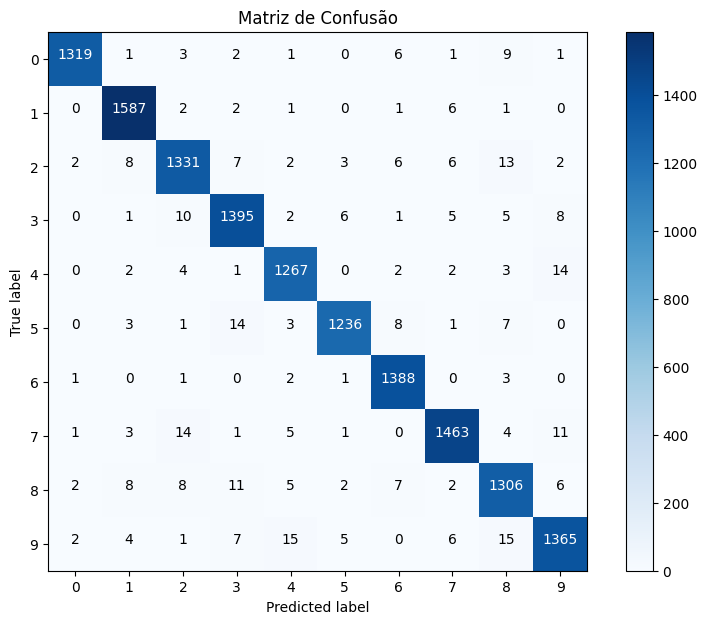

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


# Carregar o dataset MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

# Normalizar os dados
X = X / 255.0

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo (Rede Neural Multilayer Perceptron)
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Calcular a precisão
precision = precision_score(y_test, y_pred, average='weighted')

# Calcular o recall (sensibilidade)
recall = recall_score(y_test, y_pred, average='weighted')

# Calcular o F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimir os resultados
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir o relatório de classificação
print(classification_report(y_test, y_pred))

# Plotar a matriz de confusão
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Adicionar anotações de texto com os valores
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2. else "black")



plt.show()

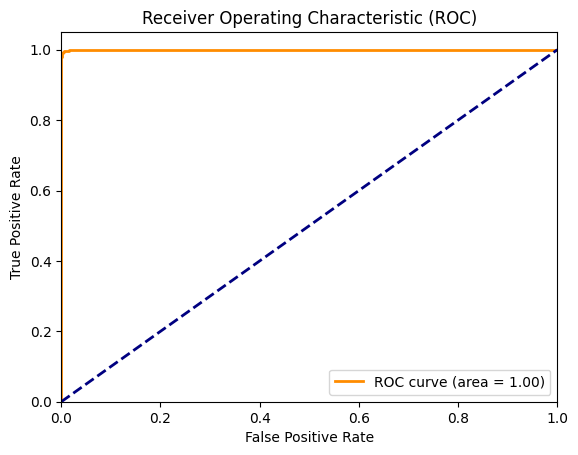

AUC: 0.9992731329592605


In [2]:
# Obter as probabilidades de previsão
y_probs = model.predict_proba(X_test)

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1], pos_label='1')  #Para multiclasse

# Calcular a AUC
roc_auc = roc_auc_score(y_test, y_probs, multi_class='ovr')


# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")

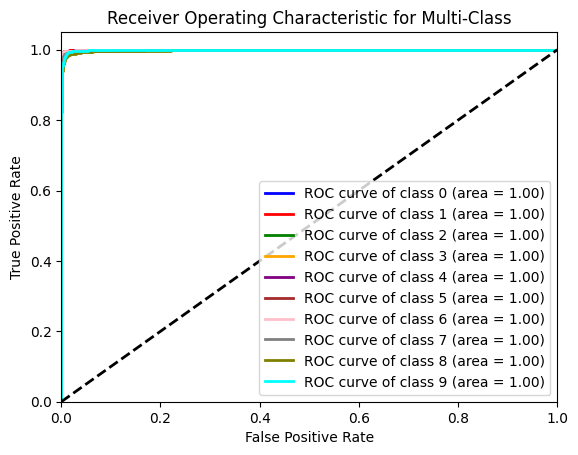

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarizar as labels para o cálculo da curva ROC multiclasse
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Calcular a curva ROC para cada classe
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotar a curva ROC para cada classe
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()